In [1]:
import pandas as pd
import numpy as np
np.random.seed(2121)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras import utils
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential

In [2]:
train = pd.read_csv('train_eda.csv')

In [5]:
train.drop('ageuponoutcome', axis=1, inplace=True)

In [11]:
month_dict={'Jan':1,
           'Feb':2,
            'March':3,
            'April':4,
           'May':5,
            'June':6,
           'July':7,
            'Aug':8,
           'Sept':9,
           'Oct':10,
           'Nov':11,
           'Dec':12}

train.month = train['month'].map(month_dict)

In [12]:
train.month = train.month/12

In [14]:
target = 'outcometype'

y = train[target]
X = train[[col for col in train.columns if col != target]]

In [15]:
X_train, X_test, y_train, y_test =\
    train_test_split(X,y,
                    shuffle = True,
                    random_state=1212,
                    test_size = .2)

In [16]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [19]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [22]:
X_train.shape

(21382, 25)

In [27]:
m1 = Sequential()

m1.add(Dense(16,
             activation='relu',
             input_shape=(25,)))

m1.add(Dense(8,
             activation='relu'))

m1.add(Dense(5,
             activation='softmax'))

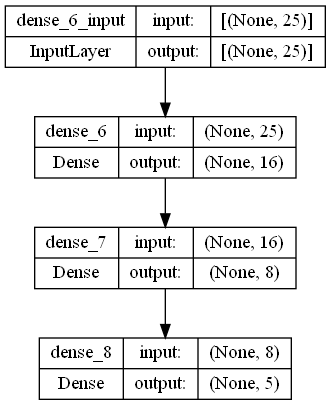

In [28]:
utils.plot_model(m1, show_shapes=True)

In [30]:
m1.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

In [33]:
h1 = m1.fit(X_train,
                y_train, 
                batch_size=32,
                validation_data=(X_test, y_test),
                epochs=100,
                verbose=1)

Epoch 1/100
669/669 [==============================] - 2s 2ms/step - loss: 0.8673 - accuracy: 0.6361 - val_loss: 0.8901 - val_accuracy: 0.6195
Epoch 2/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8657 - accuracy: 0.6360 - val_loss: 0.8784 - val_accuracy: 0.6266
Epoch 3/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8648 - accuracy: 0.6367 - val_loss: 0.8776 - val_accuracy: 0.6354
Epoch 4/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8644 - accuracy: 0.6355 - val_loss: 0.8774 - val_accuracy: 0.6296
Epoch 5/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8627 - accuracy: 0.6355 - val_loss: 0.8752 - val_accuracy: 0.6321
Epoch 6/100
669/669 [==============================] - 2s 2ms/step - loss: 0.8628 - accuracy: 0.6359 - val_loss: 0.8783 - val_accuracy: 0.6336
Epoch 7/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8618 - accuracy: 0.6372 - val_loss: 0.8761 - val_accuracy: 0.6343

Epoch 58/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8501 - accuracy: 0.6415 - val_loss: 0.8767 - val_accuracy: 0.6339
Epoch 59/100
669/669 [==============================] - 2s 2ms/step - loss: 0.8502 - accuracy: 0.6397 - val_loss: 0.8762 - val_accuracy: 0.6315
Epoch 60/100
669/669 [==============================] - 2s 2ms/step - loss: 0.8499 - accuracy: 0.6410 - val_loss: 0.8762 - val_accuracy: 0.6308
Epoch 61/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8506 - accuracy: 0.6403 - val_loss: 0.8791 - val_accuracy: 0.6270
Epoch 62/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8500 - accuracy: 0.6403 - val_loss: 0.8797 - val_accuracy: 0.6253
Epoch 63/100
669/669 [==============================] - 2s 2ms/step - loss: 0.8499 - accuracy: 0.6388 - val_loss: 0.8764 - val_accuracy: 0.6339
Epoch 64/100
669/669 [==============================] - 1s 2ms/step - loss: 0.8497 - accuracy: 0.6412 - val_loss: 0.8786 - val_accuracy:

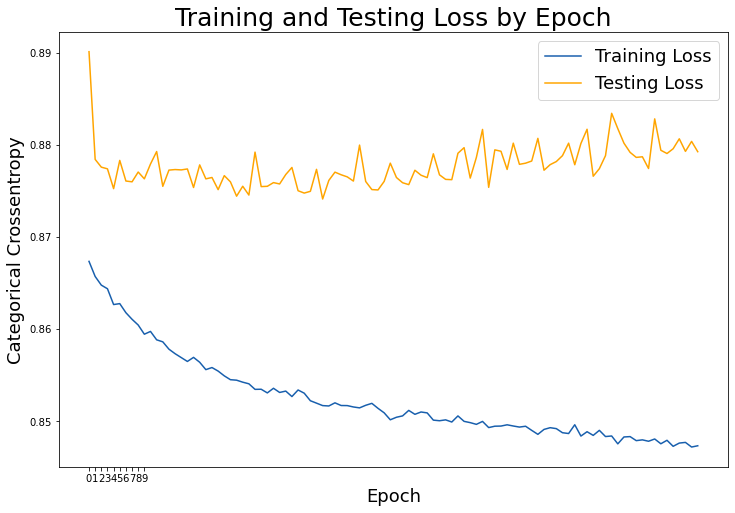

In [36]:
# Check out our train loss and test loss over epochs
train_loss = h1.history['loss']
test_loss = h1.history['val_loss']

# Set figure size
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);